In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    from tensorflow.keras.optimizers import RMSprop
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

In [3]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory(
    'D:\\Python\\MachineLearning\\MachineLearning\\week08\\data\\CNN_MultiClass_data\\CNN_MultiClass_data\\animals',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=10,
    class_mode='categorical',subset = 'training')
    epochs = 10
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    'D:\\Python\\MachineLearning\\MachineLearning\\week08\\data\\CNN_MultiClass_data\\CNN_MultiClass_data\\validation',
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 301ms/step - acc: 0.4467 - loss: 1.2705 - val_acc: 0.6180 - val_loss: 0.7583
Epoch 2/10
 75/150 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - acc: 0.6116 - loss: 0.7700

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - acc: 0.6212 - loss: 0.7521 - val_acc: 0.5600 - val_loss: 0.7485
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 233ms/step - acc: 0.6099 - loss: 0.7272 - val_acc: 0.6400 - val_loss: 0.7049
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - acc: 0.6934 - loss: 0.6107 - val_acc: 0.6160 - val_loss: 0.7333
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - acc: 0.7124 - loss: 0.5822 - val_acc: 0.6240 - val_loss: 0.7020
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - acc: 0.7404 - loss: 0.5640 - val_acc: 0.6800 - val_loss: 0.6293
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - acc: 0.7749 - loss: 0.5051 - val_acc: 0.6720 - val_loss: 0.7039
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - acc: 0.7788 - loss: 0.5118 - val_acc: 0.7240 - val_loss: 0.5886
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - acc: 0.8201 - loss: 0.3987 - val_acc: 0.7160 - val_loss: 0.6067
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16

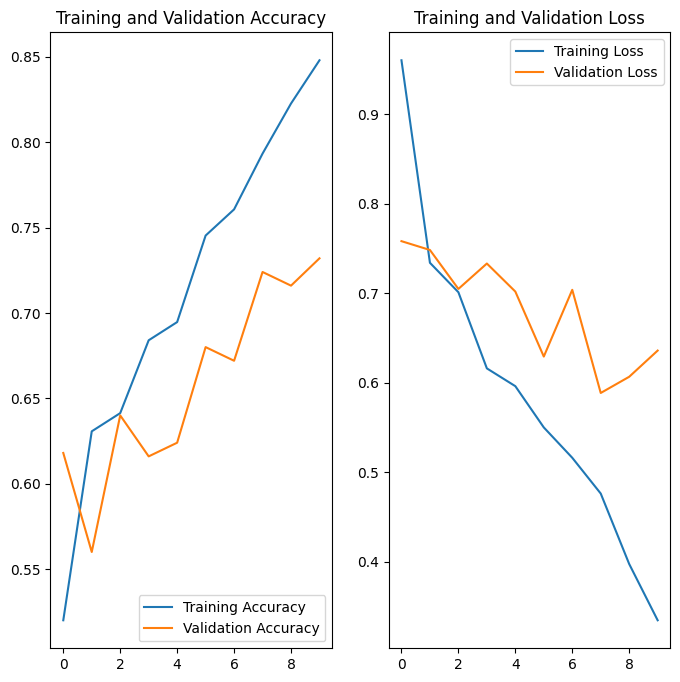

Training Accuracy:
0.8479999899864197
Testing Accuracy:
0.7319999933242798


In [4]:
train_test_animals()